In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score, davies_bouldin_score, mean_squared_error
from sklearn.decomposition import PCA, FastICA
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.random_projection import GaussianRandomProjection

from scipy.stats import kurtosis

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore')


In [2]:
email_data = pd.read_csv("./spambase.csv")

# exclude id column
email_input=email_data.iloc[:,1:-1]
email_target=email_data.iloc[:,-1]

In [3]:
mobile_data = pd.read_csv("./mobile_price.csv")
mobile_data.describe()
mobile_input=mobile_data.iloc[:,:-1]
mobile_target=mobile_data.iloc[:,-1]

In [4]:
def data_refine(input,target):
    # train_input, test_input, train_target, test_target = train_test_split(input, target,random_state = 42, test_size=0.3)
    ss = MinMaxScaler()
    input_scaled = ss.fit_transform(input)
    # test_input_scaled = ss.transform(test_input)
    return input_scaled, target

In [5]:
email_scaled_input, _ = data_refine(email_input, email_target)
mobile_scaled_input, _ = data_refine(mobile_input, mobile_target)

In [6]:
print(f"email dataset has {email_input.shape[1]} features")
print(f"mobile dataset has {mobile_input.shape[1]} features")

email dataset has 57 features
mobile dataset has 20 features


In [7]:
pca = PCA()
pca.fit(email_scaled_input)
email_cumsum = np.cumsum(pca.explained_variance_ratio_)
email_d = np.argmax(email_cumsum >= 0.90) + 1

34


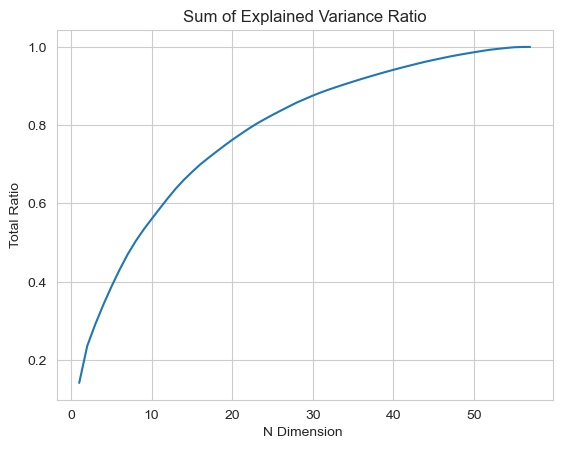

In [8]:
print(email_d)
plt.figure()
plt.title("Sum of Explained Variance Ratio")
plt.ylabel("Total Ratio")
plt.xlabel("N Dimension ")
plt.plot(range(1,58),email_cumsum[:57])
plt.show()

In [9]:
pca_mobile = PCA()
pca_mobile.fit(mobile_scaled_input)
mobile_cumsum = np.cumsum(pca_mobile.explained_variance_ratio_)
mobile_d = np.argmax(mobile_cumsum >= 0.90) + 1

15


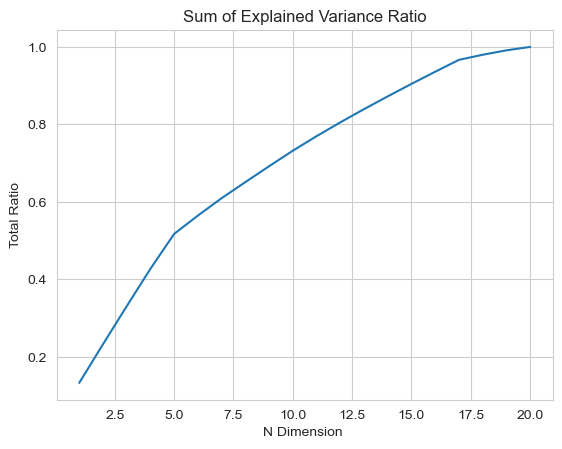

In [10]:
print(mobile_d)
plt.figure()
plt.title("Sum of Explained Variance Ratio")
plt.ylabel("Total Ratio")
plt.xlabel("N Dimension ")
plt.plot(range(1,21),mobile_cumsum[:20])
plt.show()

# ICA

### Email

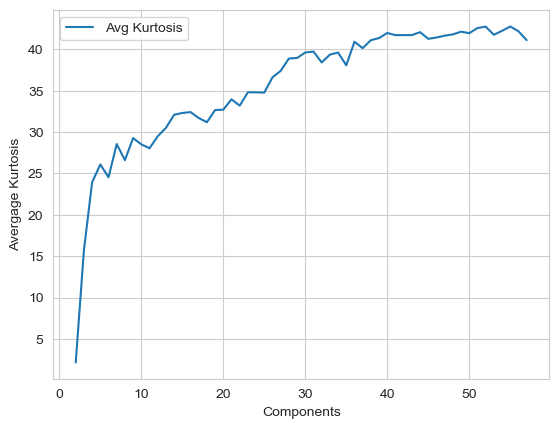

[2.1401296598586597, 15.727351812504443, 23.935580176987546, 26.09422638113469, 24.5410465530186, 28.56233409910908, 26.614674978540748, 29.282582500321794, 28.523160772043468, 28.04892633544865, 29.496902617197435, 30.514204891005104, 32.101243740648194, 32.31391390375947, 32.42856937263085, 31.707772600850575, 31.203153599294158, 32.67156661980924, 32.71590085183858, 33.970478525720516, 33.20576722879068, 34.82236963516643, 34.81462865733499, 34.78044307402736, 36.63306409117237, 37.410809487359835, 38.90297461719029, 38.96914756845184, 39.63263175714598, 39.739538801405054, 38.434201168838946, 39.37241930293429, 39.629990767703255, 38.080864575624204, 40.934292111242215, 40.1552907204391, 41.120153239448236, 41.37653489366768, 41.990771054746666, 41.73553236168268, 41.73263754454108, 41.73534173940738, 42.09117323187311, 41.28541314041248, 41.44494107256588, 41.666504069237384, 41.81903111623752, 42.15166316295676, 41.967092643368886, 42.590139165254215, 42.76048559705024, 41.770270

In [11]:
avg_kurt_email = []
for i in range(2,58):
    ica_email = FastICA(n_components=i, whiten=True, random_state=42)
    ica_email.fit(email_scaled_input)
    mean_kurt = np.mean([kurtosis(x) for x in ica_email.components_])
    avg_kurt_email.append(mean_kurt)

plt.plot(range(2, 58), avg_kurt_email, label="Avg Kurtosis")
plt.ylabel("Avergage Kurtosis")
plt.xlabel("Components")
plt.legend(loc="best")
plt.show()
# print(avg_kurt_email)
print(avg_kurt_email)
# best pick is 14

### Mobile

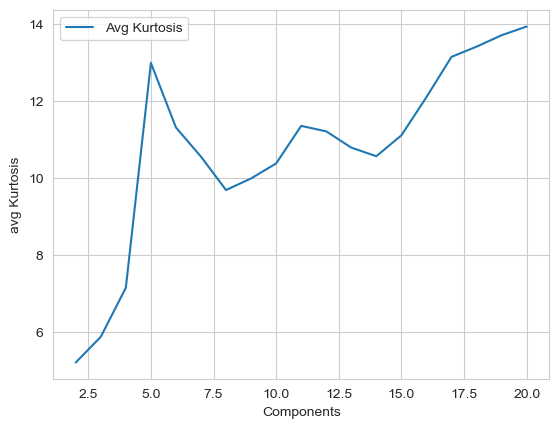

[5.220485717584091, 5.887963571160917, 7.160973839545637, 13.000038459803227, 11.323737895026317, 10.566098762982165, 9.698462554214082, 10.000441548328249, 10.38916226076382, 11.36480888396219, 11.222507431075657, 10.800830925068084, 10.57731729979591, 11.118772151328045, 12.110393143680087, 13.156965855381642, 13.4215711171284, 13.718111335594953, 13.94483837082188]


In [12]:
avg_kurt_mobile = []
for i in range(2,21):
    ica_mobile = FastICA(n_components=i, whiten=True, random_state=42)
    ica_mobile.fit(mobile_scaled_input)
    mean_kurt = np.mean([kurtosis(x) for x in ica_mobile.components_])
    avg_kurt_mobile.append(mean_kurt)


plt.plot(range(2, 21), avg_kurt_mobile, label="Avg Kurtosis")
plt.ylabel("avg Kurtosis")
plt.xlabel("Components")
plt.legend(loc="best")
plt.show()
print(avg_kurt_mobile)

# Randomized Projections

error less than 0.2 is component 1


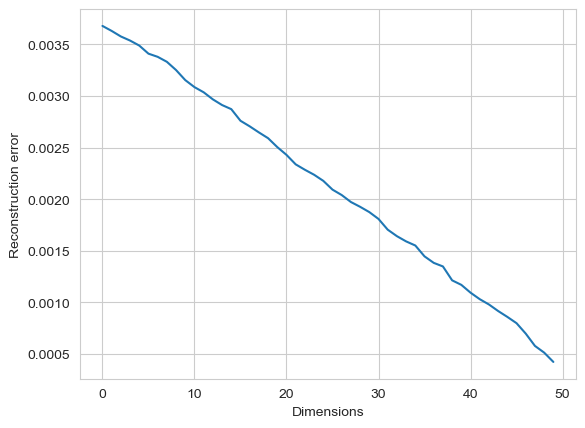

In [13]:
email_rec_errors = []
for i in range(1,51):
    email_rp = GaussianRandomProjection(n_components=i, random_state=42)
    email_reduced = email_rp.fit_transform(email_scaled_input)
    email_reconstructed = np.dot(email_reduced, np.linalg.pinv(email_rp.components_.T))
    email_error = mean_squared_error(email_scaled_input, email_reconstructed)
    email_rec_errors.append(email_error)

plt.figure()
plt.plot(email_rec_errors)
plt.ylabel("Reconstruction error")
plt.xlabel("Dimensions")
plt.show
print(f"error less than 0.2 is component {np.argmin(np.array(email_rec_errors)>=0.20) +1 }")
# But we will choose 5

error less than 0.2 is component 11


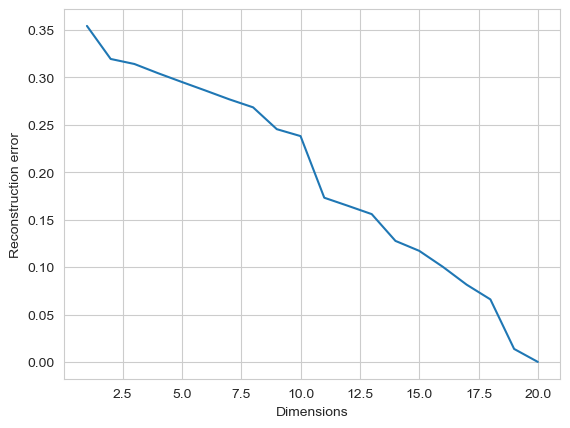

In [14]:
rec_errors = []
for i in range(1,21):
    rp = GaussianRandomProjection(n_components=i, random_state=42)
    reduced = rp.fit_transform(mobile_scaled_input)
    reconstructed = np.dot(reduced, np.linalg.pinv(rp.components_.T))
    error = mean_squared_error(mobile_scaled_input, reconstructed)
    rec_errors.append(error)

plt.figure()
plt.plot(range(1,21), rec_errors)
plt.ylabel("Reconstruction error")
plt.xlabel("Dimensions")
plt.show
print(f"error less than 0.2 is component {np.argmin(np.array(rec_errors)>=0.20) +1 }")

# Feature Selection : DecisionTree Classifier

<AxesSubplot:>

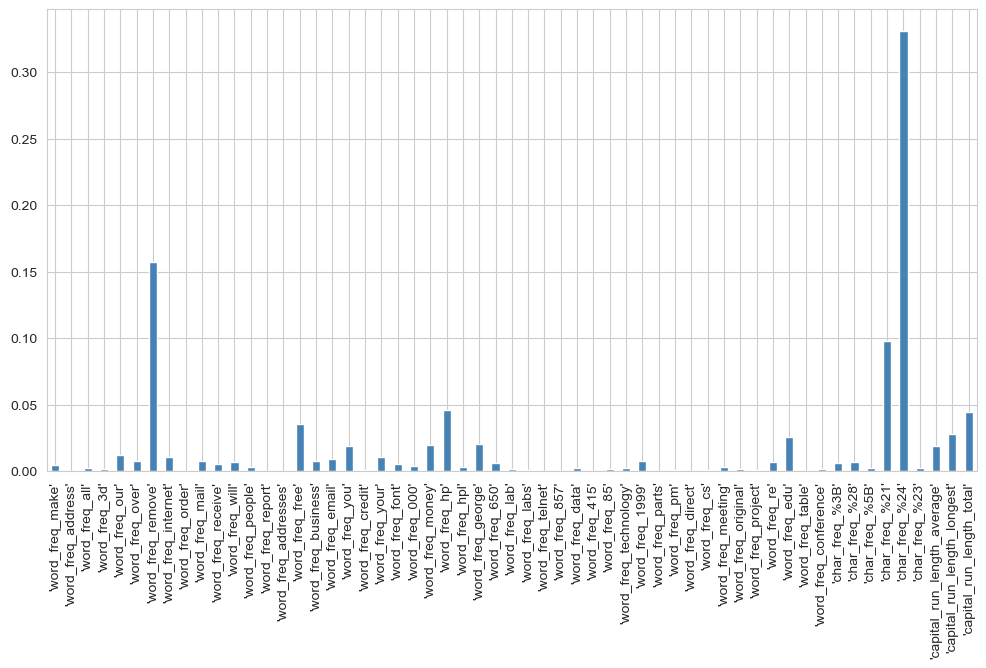

In [15]:
clf_email = DecisionTreeClassifier()
clf_email.fit(email_scaled_input, email_target)
pd.Series(clf_email.feature_importances_, index=email_input.columns).plot.bar(color='steelblue', figsize=(12, 6))

In [16]:
# https://scikit-learn.org/stable/modules/feature_selection.html
trans_email = SelectFromModel(clf_email, threshold='mean')

email_trans = trans_email.fit_transform(email_scaled_input, email_target)
print(trans_email.__dict__)
print(email_trans.shape)
print(email_input.shape)

{'estimator': DecisionTreeClassifier(), 'threshold': 'mean', 'prefit': False, 'importance_getter': 'auto', 'norm_order': 1, 'max_features': None, 'estimator_': DecisionTreeClassifier()}
(4601, 12)
(4601, 57)


<AxesSubplot:>

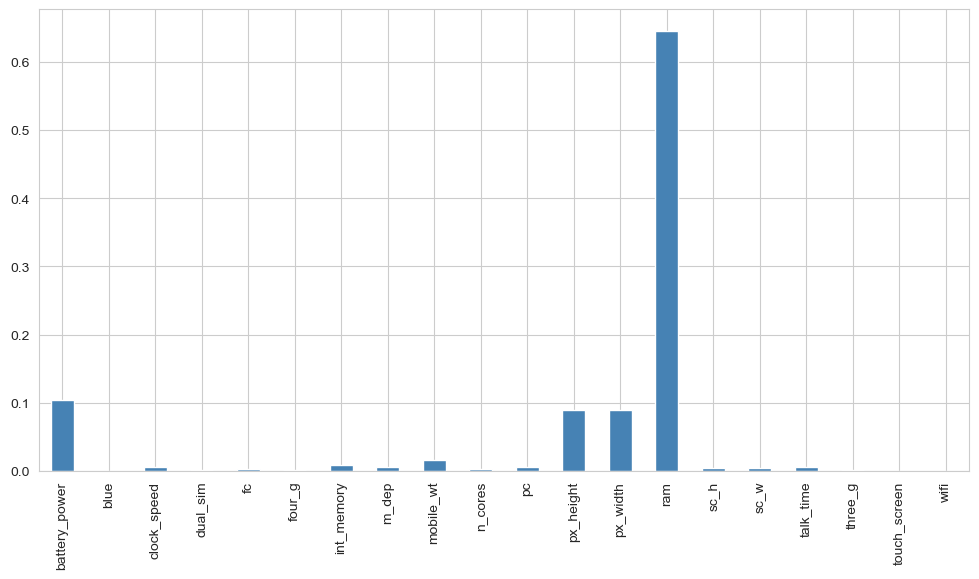

In [17]:
clf_mobile = DecisionTreeClassifier()
clf_mobile.fit(mobile_scaled_input, mobile_target)
pd.Series(clf_mobile.feature_importances_, index=mobile_input.columns).plot.bar(color='steelblue', figsize=(12, 6))

In [18]:
trans_mobile = SelectFromModel(clf_mobile, threshold='mean')
mobile_trans = trans_mobile.fit_transform(mobile_scaled_input, mobile_target)
print(mobile_trans.shape)
print(mobile_input.shape)

(2000, 4)
(2000, 20)
